In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from pathlib import Path
from typing import Callable
import sys

In [83]:
import os
import imageio.v2 as imageio
from PIL import Image
from IPython.display import display, Image

# Loss Function

TODO: Explique que essa los é meramente ilustrativa

In [2]:
def loss_fn(x):
    return np.round(x ** 2 + 2 * np.sin(2 * x) + 2 * np.cos(3 * x), 2)

In [3]:
def loss_fn_derivative(x):
    return np.round(2 * x + 4 * np.cos(2 * x) - 6 * np.sin(3 * x), 2)

In [5]:
def create_organization_files(optimizer_name: str) -> None:
    root_path = Path('optimizers')
    folder = root_path / Path(optimizer_name)
    images_folder = folder / 'images'
    gif_folder = folder / 'gif'
    
    images_folder.mkdir(parents=True, exist_ok=True)
    gif_folder.mkdir(parents=True, exist_ok=True)
    return None

In [101]:
def create_gif(optimizer_name: str) -> None:
    from PIL import Image
    image_folder = f"./optimizers/{optimizer_name}/images/"
    image_files = sorted(
        os.listdir(image_folder), 
        key=lambda x: int(x.split("_")[-1].split(".")[0])
    )
    fixed_size = (500, 380)  # Ajuste para o tamanho desejado
    
    images = [
        Image.open(os.path.join(image_folder, img)).resize(fixed_size) 
        for img in image_files
    ]
    gif_path = f"./optimizers/{optimizer_name}/gif/{optimizer_name}.gif"
    imageio.mimsave(
        gif_path, 
        images, 
        duration=15.5, 
        loop=0
    )

def gif_display(optimizer_name: str) -> None:
    gif_path = f"./optimizers/{optimizer_name}/gif/{optimizer_name}.gif"
    display(Image(filename=gif_path))
    return None

In [6]:
Coordenate = namedtuple('Coordenate', ['x', 'y'])
Coordenates = namedtuple('Coordenates', ['x', 'y'])

In [7]:
x = np.linspace(-5, 5, 100)
y = loss_fn(x)

In [9]:
coords = Coordenates(x=x, y=y)

In [95]:
def save_steps_optimizer(
    point: Coordenate, 
    step: int,
    optmizer_name: str,
    # graph: Coordenates = coords
) -> None:
    x = np.linspace(-5, 5, 100)
    y = loss_fn(x)
    graph = Coordenates(x=x, y=y)
    fig, ax = plt.subplots()
    ax.plot(graph.x, graph.y)
    ax.scatter(point.x, point.y, color='r', s=50, label=optmizer_name)
    ax.grid(True, linestyle=':')
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_title(f'Loss Function | Step: {step}')
    ax.legend(loc='lower right')
    filename = f"/step_{step}.png"
    plt.savefig(
        f'optimizers/{optmizer_name}/images' + filename, 
        dpi=300, 
        bbox_inches='tight'
    )
    plt.close(fig)
    return None

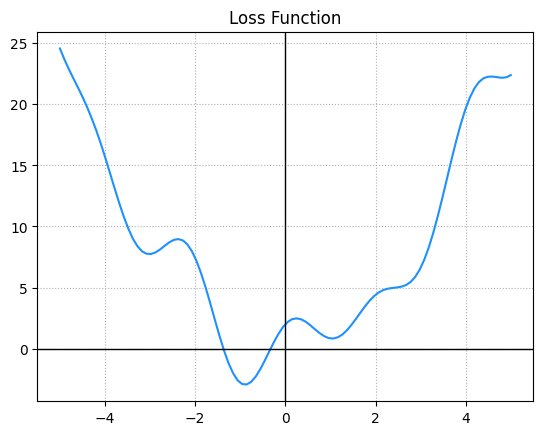

In [11]:
# plot loss
fig, ax = plt.subplots()
ax.plot(coords.x, coords.y, color='#1E90FF')
ax.grid(True, linestyle=':')
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_title('Loss Function')
plt.show()

In [12]:
y_derivate = loss_fn_derivative(x)
coords_d = Coordenates(x=x, y=y_derivate)

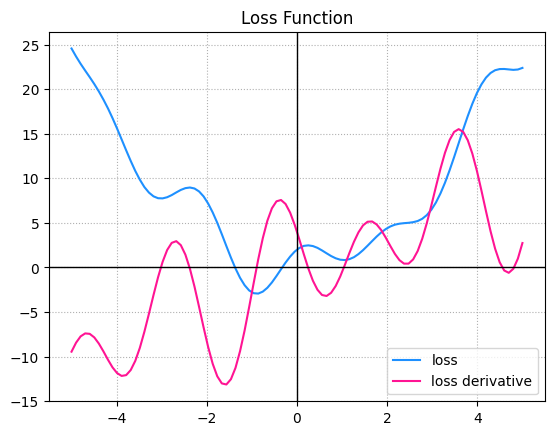

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y, color='#1E90FF', label='loss')
ax.plot(
    coords_d.x,
    coords_d.y, 
    color='#FF1493', 
    label='loss derivative', 
)
ax.grid(True, linestyle=':')
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_title('Loss Function')
ax.legend()
plt.show()

In [15]:
x_position = 4
coord_initial = Coordenate(x=x_position, y=loss_fn(x_position))

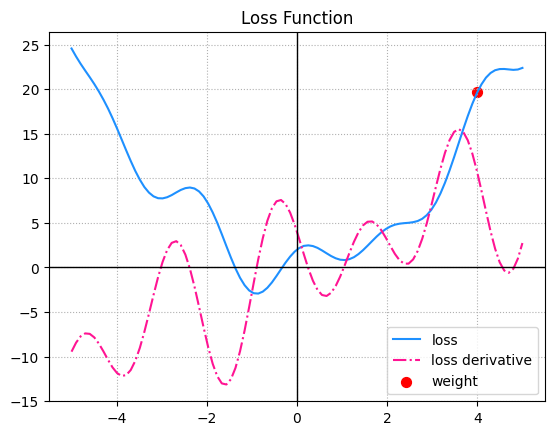

In [21]:
# plot loss
fig, ax = plt.subplots()
ax.plot(x, y, color='#1E90FF', label='loss')
ax.plot(
    coords_d.x,
    coords_d.y, 
    color='#FF1493', 
    label='loss derivative', 
    linestyle='-.'
)
ax.scatter(
    coord_initial.x, 
    coord_initial.y, 
    color='r', 
    s=50, 
    label='weight',
)
ax.grid(True, linestyle=':')
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_title('Loss Function')
ax.legend(loc='lower right')
plt.show()

# SGD

In [22]:
OPTIMIZER_NAME = 'SGD'

In [23]:
create_organization_files(optimizer_name=OPTIMIZER_NAME)

In [24]:
def sgd_backpropagation(
    x_old: float, 
    lr: float = 1e-2
) -> Coordenate:
    x_new = np.round(x_old - lr * loss_fn_derivative(x_old), 2)
    y_new = np.round(loss_fn(x_new), 2)
    return Coordenate(x_new, y_new)

## BACKPORPAGATION SGD

In [103]:
STEPS = 100
LR = 1e-1

In [104]:
def backpropagation(
    optmizer_name: str,
    backpropagation_fn: Callable[[Coordenate], Coordenate], 
    point: Coordenate = coord_initial,
    steps: int = STEPS, 
    lr: float = LR,
) -> None:
    # Save first image
    save_steps_optimizer(
        point=point, 
        step=0, 
        optmizer_name=optmizer_name
    )
    
    bar_length = 30
    # update weight
    new_point = point
    for step in range(1, steps + 1):
        new_point = backpropagation_fn(new_point.x)
        save_steps_optimizer(point=new_point, step=step, optmizer_name=optmizer_name)

        # Progress bar
        progress = step / steps
        num_bars = int(progress * bar_length)
        bar = '=' * num_bars + '.' * (bar_length - num_bars)
        sys.stdout.write(f"\r[{bar}] {step}/{steps}")
        sys.stdout.flush()
    return None

In [105]:
backpropagation(
    optmizer_name='SGD',
    backpropagation_fn=sgd_backpropagation,
    steps=50
)

[==============================] 50/50

In [106]:
create_gif(optimizer_name=OPTIMIZER_NAME)

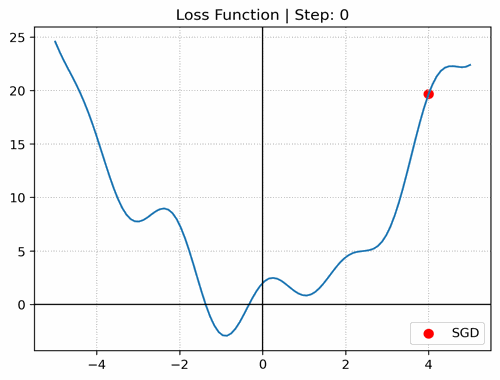

In [107]:
gif_display(optimizer_name=OPTIMIZER_NAME)

# SGD with MOMENTUM

In [108]:
class SGDWithMomentum:
    def __init__(self, beta: float = 0.9):
        self.v = 0
        self.beta = beta

    def step(self, x_old: float, lr: float = 1e-2) -> Coordenate:
        self.v = self.beta * self.v + (1 - self.beta) * loss_fn_derivative(x_old)
        x_new = np.round(x_old - lr * self.v, 2)
        y_new = np.round(loss_fn(x_new), 2)
        return Coordenate(x_new, y_new)

In [109]:
optimizer = SGDWithMomentum()

In [111]:
OPTIMIZER_NAME = 'SGD_MOMENTUM'

In [112]:
create_organization_files(optimizer_name=OPTIMIZER_NAME)

In [116]:
backpropagation(
    optmizer_name=OPTIMIZER_NAME,
    backpropagation_fn=optimizer.step,
    steps=100
)

[==============================] 100/100

In [117]:
create_gif(optimizer_name=OPTIMIZER_NAME)

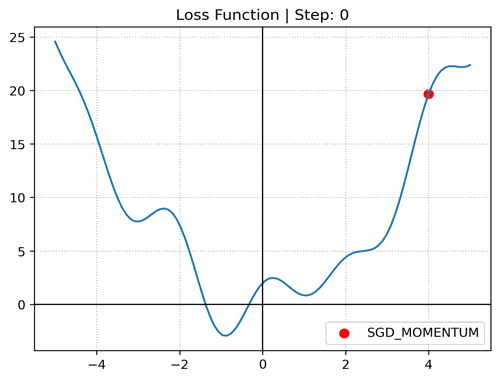

In [118]:
gif_display(optimizer_name=OPTIMIZER_NAME)